# Task1 : Optical Character Recognition (OCR)

In [1]:
# Import required packages for text recognition
import cv2  # for image processing
import pytesseract  # for image-to-text
import matplotlib.pyplot as plt # for display

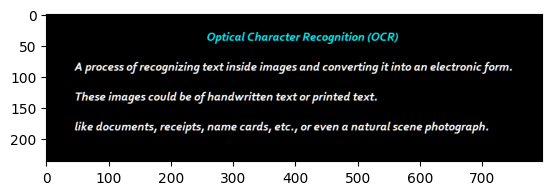

In [2]:
# Read image from which text needs to be extracted
img = cv2.imread("test_img.png")
plt.imshow(img)

In [3]:
# Configure pytesseract module
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

### Image Preprocessing  

In [4]:
# Convert the image to gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
# Putting a threshold (OTSU)
# pixels with value below 100 are turned black (0) and those with higher value are turned white (255)
ret, thresh1 = cv2.threshold(img_gray, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)

In [6]:
# Specify structure shape and kernel size.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))
 
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

In [7]:
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

## Text Detection

Text has been saved in 'recognized.txt' 

The extracted text:

Optical Character Recognition (OCR)

A process of recognizing text inside images and converting it into an electronic form.

These images could be of handwritten text or printed text.

like documents, receipts, name cards, etc., or even a natural scene photograph.



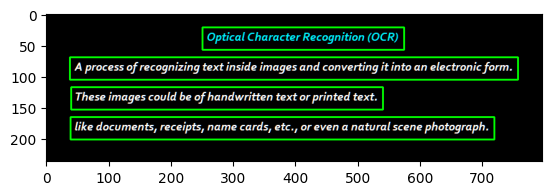

In [8]:
# text detection
# Looping through the identified contours

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect_img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Showing image after detecting text
    plt.imshow(rect_img) 
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(rect_img)
    # Append text to a file
    with open("recognized.txt", "a") as file:
        file.write(f"\n{text}")
print("Text has been saved in 'recognized.txt' \n")
print(f"The extracted text:\n\n{text}")